In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
## Google Colab related codes
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
DataDir = pathlib.Path('/content/drive/My Drive/Colab Notebooks/preg_imgs')
PositiveImages = list(DataDir.glob('processed_positive_images/*'))
NegativeImages = list(DataDir.glob('processed_negative_images/*'))

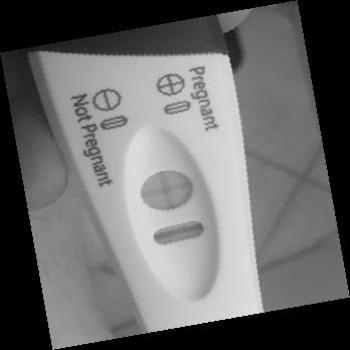

In [4]:
PIL.Image.open(str(PositiveImages[15]))

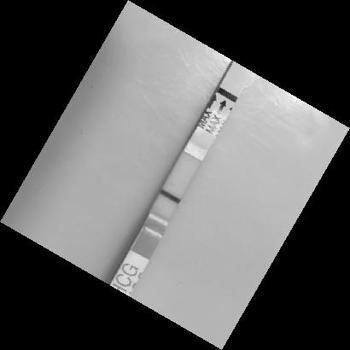

In [5]:
PIL.Image.open(str(NegativeImages[15]))


In [6]:
batch_size=32
train = tf.keras.preprocessing.image_dataset_from_directory(
    DataDir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(350, 350),
    label_mode='categorical',
    batch_size=batch_size
)

Found 9747 files belonging to 2 classes.
Using 7798 files for training.


In [7]:
val = tf.keras.preprocessing.image_dataset_from_directory(
    DataDir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(350, 350),
    label_mode='categorical',
    batch_size=32
)

Found 9747 files belonging to 2 classes.
Using 1949 files for validation.


In [8]:
ClassNames = train.class_names
print(ClassNames)

['processed_negative_images', 'processed_positive_images']


In [9]:
## Training the model

ResNet = Sequential()

pretrained_ResNet = tf.keras.applications.ResNet50(include_top=False,
                                                   input_shape=(350,350,3),
                                                   pooling='max',
                                                   classes=2,
                                                   weights='imagenet')
for layer in pretrained_ResNet.layers:
  layer.trainable=False

ResNet.add(pretrained_ResNet)
ResNet.add(Flatten())
ResNet.add(Dense(256,activation='relu'))
ResNet.add(Dense(2, activation='softmax'))


94765736/94765736 [==============================] - 0s 0us/step


In [10]:
ResNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 256)               524544    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 2)                 514       
 apper)                                                          
                                                                 
Total params: 24112770 (91.98 MB)
Trainable params: 525058 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
___________

In [11]:
ResNet.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(350, 350, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Fourth Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 batch_normalization_10 (Ba  (None, 348, 348, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 174, 174, 32)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 174, 174, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 172, 172, 64)      18496     
                                                                 
 batch_normalization_11 (Ba  (None, 172, 172, 64)     

In [12]:
epochs=23
history = ResNet.fit(
    train,
    validation_data=val,
    epochs=epochs
)

Epoch 1/23
244/244 [==============================] - 389s 1s/step - loss: 1.3810 - accuracy: 0.6750 - val_loss: 0.5572 - val_accuracy: 0.7265
Epoch 2/23
244/244 [==============================] - 42s 169ms/step - loss: 0.4603 - accuracy: 0.7807 - val_loss: 0.4773 - val_accuracy: 0.7686
Epoch 3/23
244/244 [==============================] - 41s 167ms/step - loss: 0.3977 - accuracy: 0.8179 - val_loss: 0.4175 - val_accuracy: 0.8148
Epoch 4/23
244/244 [==============================] - 41s 168ms/step - loss: 0.3618 - accuracy: 0.8392 - val_loss: 0.4573 - val_accuracy: 0.7912
Epoch 5/23
244/244 [==============================] - 41s 168ms/step - loss: 0.3288 - accuracy: 0.8562 - val_loss: 0.3813 - val_accuracy: 0.8312
Epoch 6/23
244/244 [==============================] - 41s 168ms/step - loss: 0.3010 - accuracy: 0.8654 - val_loss: 0.4577 - val_accuracy: 0.7932
Epoch 7/23
244/244 [==============================] - 41s 168ms/step - loss: 0.2929 - accuracy: 0.8739 - val_loss: 0.5271 - val_accu

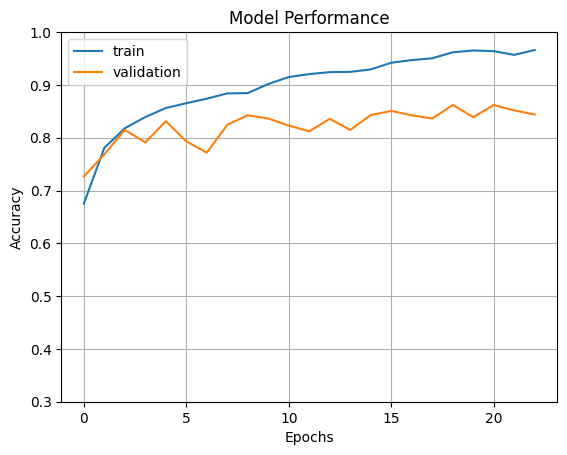

In [13]:
fig = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.3,ymax=1)
plt.grid()
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])


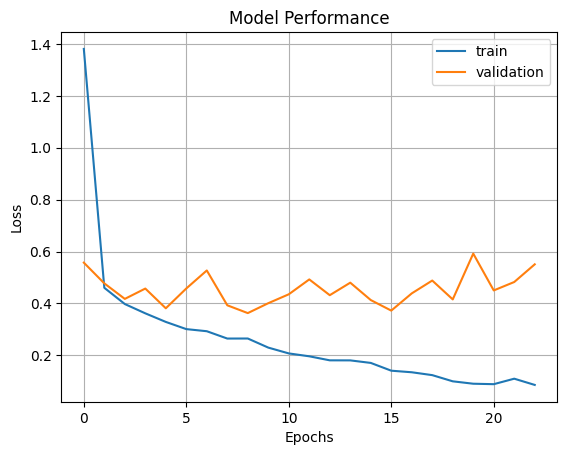

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
ResNet.save('ClearPreg_weights')

In [15]:
ResNet.save('/content/drive/My Drive/Colab Notebooks/ClearPreg_weights_23_epoch_350')